# Chapter 3 - Image Adjustmennt

Working specifically through the `ImageMorphology` package. Morphological transformations are simple mathematical operations applied to do things like remove noise, shrink, separate, identify an object, etc.

## Image Binarization

It's useful to make images binary for several of these methods, in this case 0 (black) being background 1 (white) being foreground. The following method will be used for a grayscale with threshold of 0.5

In [1]:
using Images, ImageView, ImageMorphology

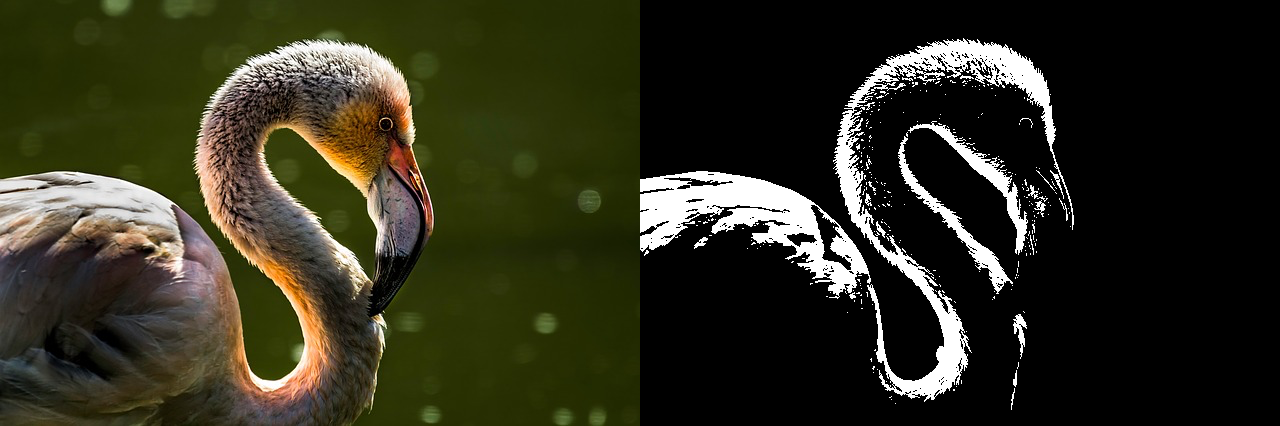

In [2]:
# load an image
img = load("../sample-images/bird-3183441_640.jpg");

# convert image to grayscale and binarise the only channel
img_binary = 1 * (Gray.(img) .> 0.5);
mosaicview(img, Gray.(img_binary), ncol=2)

### Fundamental Operations

2 base elements: binary image andn a structuring element. The structuring element is (typically) a 3x3 binary block that slides over the image and updates it. Two fundamental operations - erosion (removing pixels) and dilation (adds pixels)

#### Erosion

Convert image to grayscale and apply `erode` function. Looking at a sample of connected shapes and noise on the sides

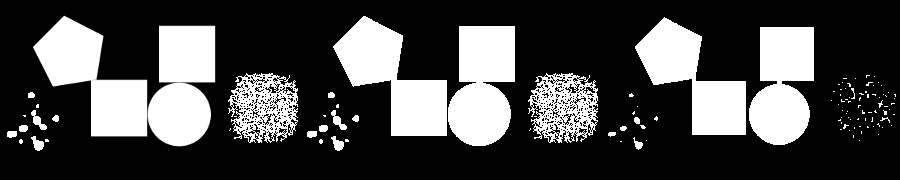

In [3]:
geom_img = load("../sample-images/geometrical-figures-and-noise.jpg")
geom_binary = Gray.(Gray.(geom_img) .> 0.5)
geom_erode = erode(geom_binary)
mosaicview(geom_img, geom_binary, geom_erode, ncol=3)

There's still noise here, so we can just run erode a bunch of times.

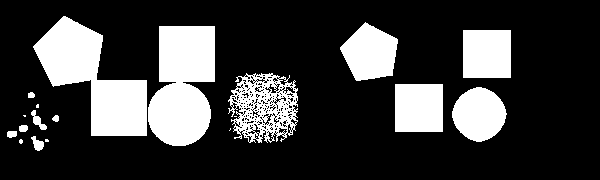

In [4]:
EROSIONS = 4
geom_binary = Gray.(Gray.(geom_img) .> 0.5)
geom_erode = erode(geom_binary)
for _ in 1:(EROSIONS-1)
    geom_erode = erode(geom_erode)
end
mosaicview(geom_binary, geom_erode, ncol=2)

The noise is gone - which is nice. This is at the cost though of shrinking the figures and obscuring them a bit. This concept can be applied to prepare images for text recognition.

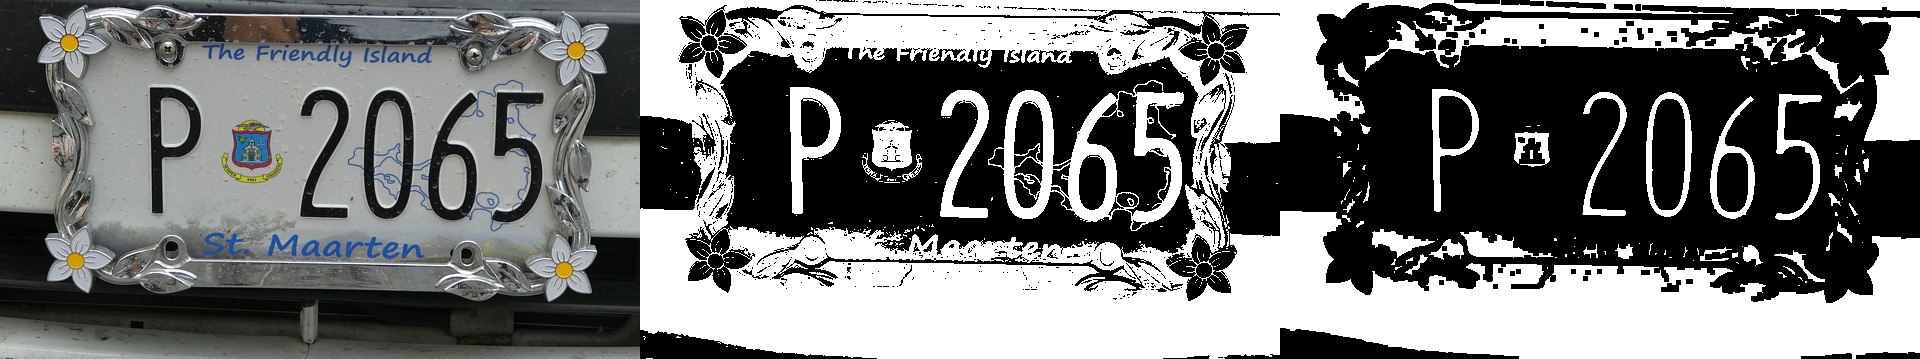

In [5]:
EROSIONS=2
carplate_img = load("../sample-images/caribbean-2726429_640.jpg")
carplate_binary = Gray.(Gray.(carplate_img) .< 0.5);
carplate_erode = deepcopy(carplate_binary)
for _ in 1:EROSIONS
    carplate_erode = erode(carplate_erode)
end
mosaicview(carplate_img, carplate_binary, carplate_erode, ncol=3)

the last image gets rid of some static text ("St. Maarten" and "The Friendly Island"), which makes this a bit easier to parse.

#### Dilation

The other major subject, enlarging boundaries. Start by looking at the same geometric image from before

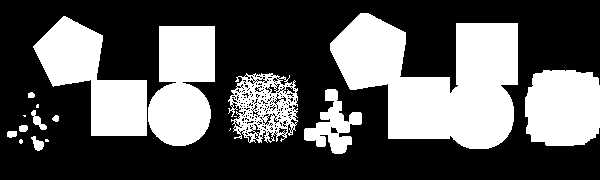

In [6]:
DILATIONS=3
geom_img_binary = Gray.(1 * Gray.(geom_img) .> 0.5);
geom_dilate = deepcopy(geom_img_binary)
for _ in 1:DILATIONS
    geom_dilate = dilate(geom_dilate)
end

mosaicview(geom_img_binary, geom_dilate, ncol=2)

Can use this also for preparation

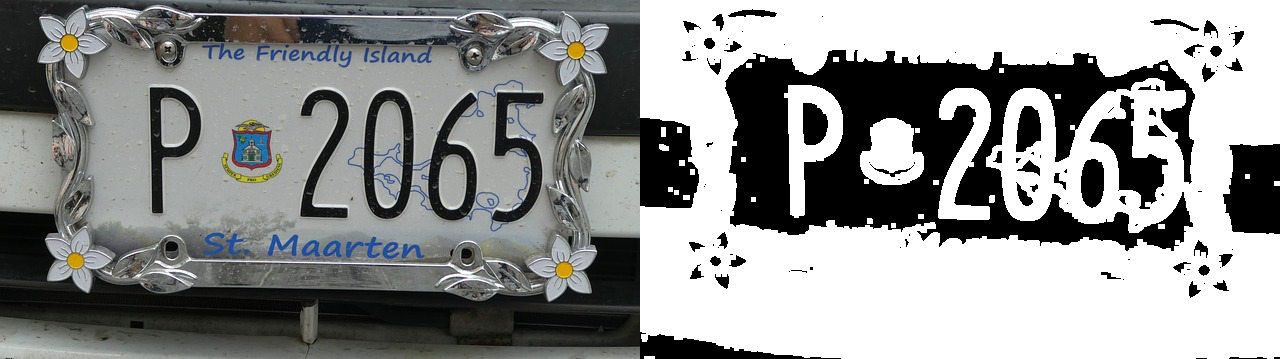

In [7]:
DILATIONS=2
carplate_binary = Gray.(Gray.(carplate_img) .< 0.5);
carplate_dilate = deepcopy(carplate_binary)
for _ in 1:DILATIONS
    carplate_dilate = dilate(carplate_dilate)
end
mosaicview(carplate_img, carplate_dilate, ncol=2)

### Image Opening and Closing

Opening is close to erosion, but less effective. Keeps forground regions similar in shape to the structuring element. Similarly, closing is similar in thought to dilation, focusing on removing background holes and not disrupting boundary shapes.

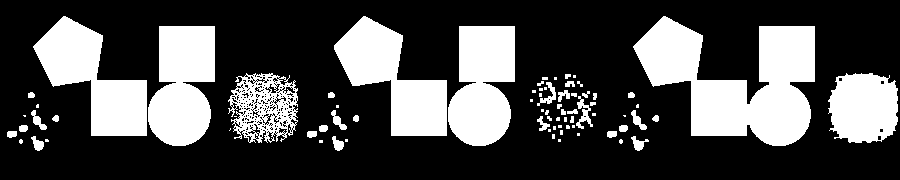

In [8]:
OPENINGS=2
CLOSINGS=2

geom_open = deepcopy(geom_img_binary)
for _ in 1:OPENINGS
    geom_open = opening(geom_open)
end

geom_close = deepcopy(geom_img_binary)
for _ in 1:CLOSINGS
    geom_close = closing(geom_close)
end

mosaicview(geom_img_binary, geom_open, geom_close, ncol=3)

## Top-hat and bottom-hat Operations

These are methods to get small details from images. `top-hat` filter enhances bright objects on a dark background, by subtracting the result of running an `opening` on an image. Conversely, `bottom-hat` enhances dark objects on a bright background, subtracting after running `closing`.

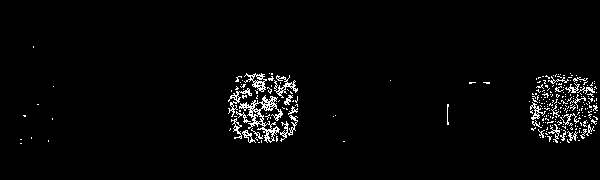

In [9]:
geom_tophat = tophat(geom_img_binary)
geom_bothat = bothat(geom_img_binary)
mosaicview(geom_tophat, geom_bothat, ncol=2)

## Adjusting Contrast

To increase constrast, add original to image to top-hat and subtract the bottom-hat.

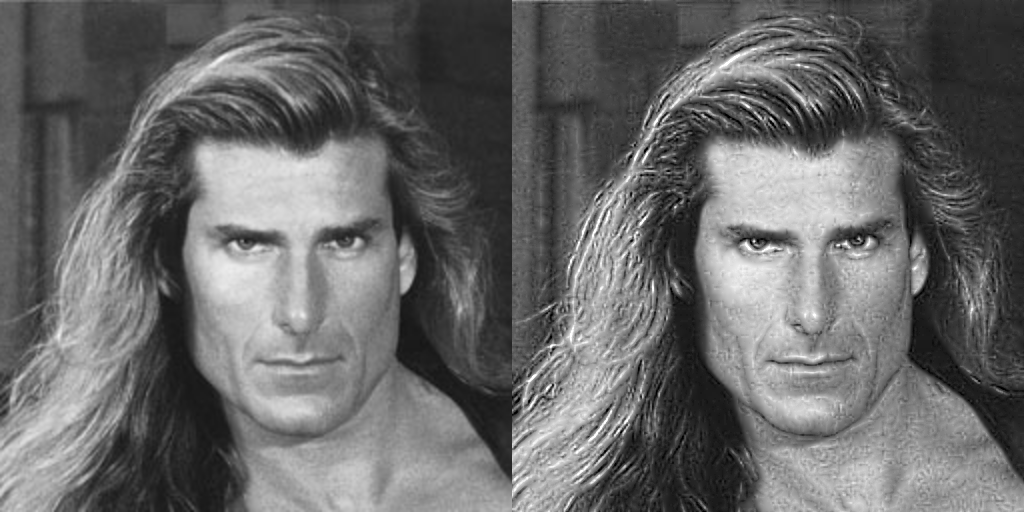

In [10]:
CONT = 3 # strength parameter
minmax = scaleminmax(Gray, 0, 1) # Fix between 0 and 1

# Adjust the contrast
img = load("../sample-images/fabio_gray_512.png");
img_gray = Gray.(img)
img_cont = minmax.(img_gray + CONT .* tophat(img_gray) - CONT .* bothat(img_gray))
mosaicview(img, img_cont, ncol=2)